In [23]:
from sklearn.datasets import fetch_openml

X,y=fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False
)

y = y.astype(int)



In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train , y_temp= train_test_split(
    X,y,
    train_size=0.3,
    random_state=42,
    stratify=y
)

X_test,X_val,y_test, y_val= train_test_split(
    X_temp,y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)
# created validation sets just for the sake of it as we use CV bellow


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(random_state=42)),
    ('svm',SVC(decision_function_shape='ovr'))
])


In [26]:
param_grid={
    'pca__n_components': [40,60],
    'svm__C' :  [1,10],
    'svm__gamma':[0.01,0.05],
    'svm__kernel': ['rbf'] 
}

In [27]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1
)

grid.fit(X_train,y_train)

,estimator,"Pipeline(step...svm', SVC())])"
,param_grid,"{'pca__n_components': [40, 60], 'svm__C': [1, 10], 'svm__gamma': [0.01, 0.05], 'svm__kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [28]:
print("best parameters:")
print(grid.best_params_)

print("best cv score:")
print(grid.best_score_)

best parameters:
{'pca__n_components': 40, 'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
best cv score:
0.9445238095238095


In [29]:
val_preds=grid.predict(X_val)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_preds=grid.predict(X_test)

print("test accuracy:",accuracy_score(y_test,test_preds))
print(confusion_matrix(y_test,test_preds))

test accuracy: 0.9531428571428572
[[2347    1   54    0    0    3    3    0    7    1]
 [   1 2718   16    3    4    1    1    6    4    3]
 [   8    3 2389   16    2    1    5   11   10    2]
 [   3    5   72 2349    0   18    0   14   27   12]
 [   0   10   73    0 2253    0    3    8    4   37]
 [   9    3   39   42    3 2070   19    5   12    7]
 [   6    3   57    1    6    7 2320    0    5    1]
 [   1   10   96    5   10    1    0 2404    3   23]
 [  14    8   58   29    1   23    6    6 2229   14]
 [   2    5   61   18   23    7    0   36   11 2273]]


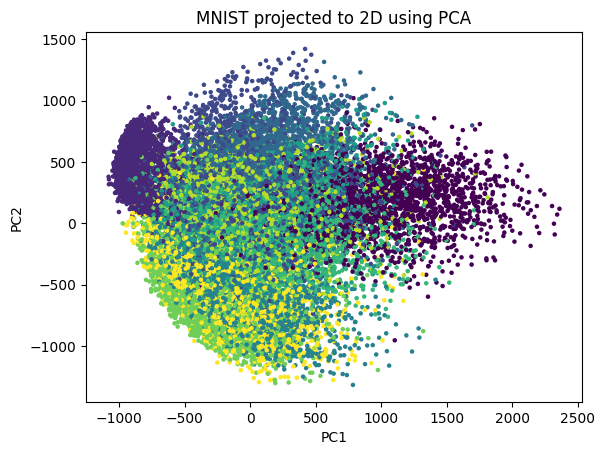

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_train)

plt.figure()
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("MNIST projected to 2D using PCA")
plt.show()


In [ ]:
import numpy as np

final_model=Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(random_state=42,n_components=40)),
    ('svm',SVC(C=10,gamma=0.01,kernel='rbf',decision_function_shape='ovr'))]
)

final_model.fit(X_train,y_train)
